In [3]:
import ipywidgets as widgets
from annotation import *


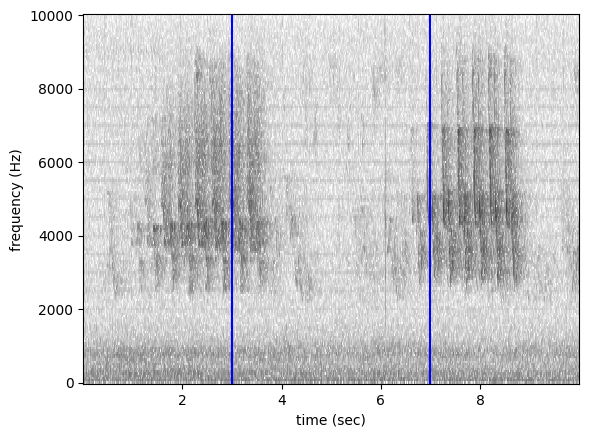

None

IntSlider(value=0)

In [5]:

plot_clip('/Users/lviotti/Library/CloudStorage/Dropbox/Work/Kitzes/data/nfwf22-TDL/dela2022a/MSD-2478/MSD-2478_20220522_100000_6272.0s-6276.0s.wav', mark_at_s = [3, 7])
time.sleep(1)
widgets.IntSlider()

In [20]:
from IPython.display import display, Markdown, clear_output

In [88]:
submit_button = widgets.Button(description='Submit')
out = widgets.Output()

@out.capture()
def on_click(_):
    # "linking function with output"
    with out:
        print('1')        
submit_button.on_click(on_click)

# widgets.VBox([submit_button,out])


In [91]:
@out.capture()
def function_with_captured_output():
    print('This goes into the output widget')
    raise Exception('As does this')

function_with_captured_output()

In [9]:
annotations_choices = [0,1,2]


chkbox = widgets.RadioButtons(
 options=annotations_choices,
 description='Unit')

button = widgets.Button(description='My Button')
display(chkbox)
display(button)

RadioButtons(description='Unit', options=(0, 1, 2), value=0)

Button(description='My Button', style=ButtonStyle())

In [ ]:
def user_input(annotations_choices, custom_annotations_dict = None, positive_annotation = '1'):
    # Make sure all strings are options
    annotations_choices = [str(x).strip().lower() for x in annotations_choices]
    
    # Define paraments to be replaced
    other_annotation = ''
    notes = ''
    
    # Wait for user input within expected parameters
    valid_annotation = False
    while valid_annotation==False:
        annotation = str(input(f"Enter annotation. Valid options are {annotations_choices}.").strip()).lower()
        
        if annotation not in annotations_choices:
            print('Not a valid annotation. Please try again.')
            continue
            
        if (annotation==positive_annotation) & (custom_annotations_dict is not None):
            valid_custum_annotation = False
            
            while valid_custum_annotation!=True:
                other_annotation = str(input(f"Add any other annotation? Valid options are {custom_annotations_dict.keys()} or press enter to skip.")).lower()
                
                if other_annotation in custom_annotations_dict.keys():
                    other_annotation = custom_annotations_dict[other_annotation]
                    valid_custum_annotation = True

                elif other_annotation=='':
                    custom_annotations_dict = ''
                    valid_custum_annotation = True

                else:
                    print('Not a valid annotation. Please try again.')
                    continue
            
        notes = str(input('Enter any notes you would like to make or press enter to skip.'))
        proceed = input(f"Does this look right? Pressing 'r' to try again.").lower()
        
        if proceed!='r':
            valid_annotation = True
            
        else:
            continue
    
        return annotation,   other_annotation, notes


In [26]:
import asyncio
def wait_for_change(widget, value):
    future = asyncio.Future()
    def getvalue(change):
        # make the new value available
        future.set_result(change.new)
        widget.unobserve(getvalue, value)
    widget.observe(getvalue, value)
    return future

In [27]:
from ipywidgets import IntSlider, Output
slider = IntSlider()
out = Output()

async def f():
    for i in range(10):
        out.append_stdout('did work ' + str(i) + '\n')
        x = await wait_for_change(slider, 'value')
        out.append_stdout('async function continued with value ' + str(x) + '\n')
asyncio.ensure_future(f())

slider

IntSlider(value=0)